# KNN Classification using "Iris Dataset"

In [1]:
# Import the libararies
import numpy as np
import pandas as pd

In [2]:
# Load Dataset
iris_data=pd.read_csv("Iris .csv")

In [3]:
# Display the Head data of the dataset
iris_data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# Shape of the dataset
iris_data.shape

(150, 6)

In [5]:
# Describe the dataset
iris_data.describee()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
# FInd number of instances from each class
iris_data.groupby("Species").size()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [7]:
features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
X=iris_data[features].values
y=iris_data['Species'].values

In [8]:
# Encoding strings
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [9]:
# Encoding String values into Numbers
y=LE.fit_transform(y)
print(set(y.tolist()))

{0, 1, 2}


In [10]:
# Splitting data into train and test
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2,random_state=0)

In [11]:
# Visualizing the data
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

C:\Users\bveer\anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

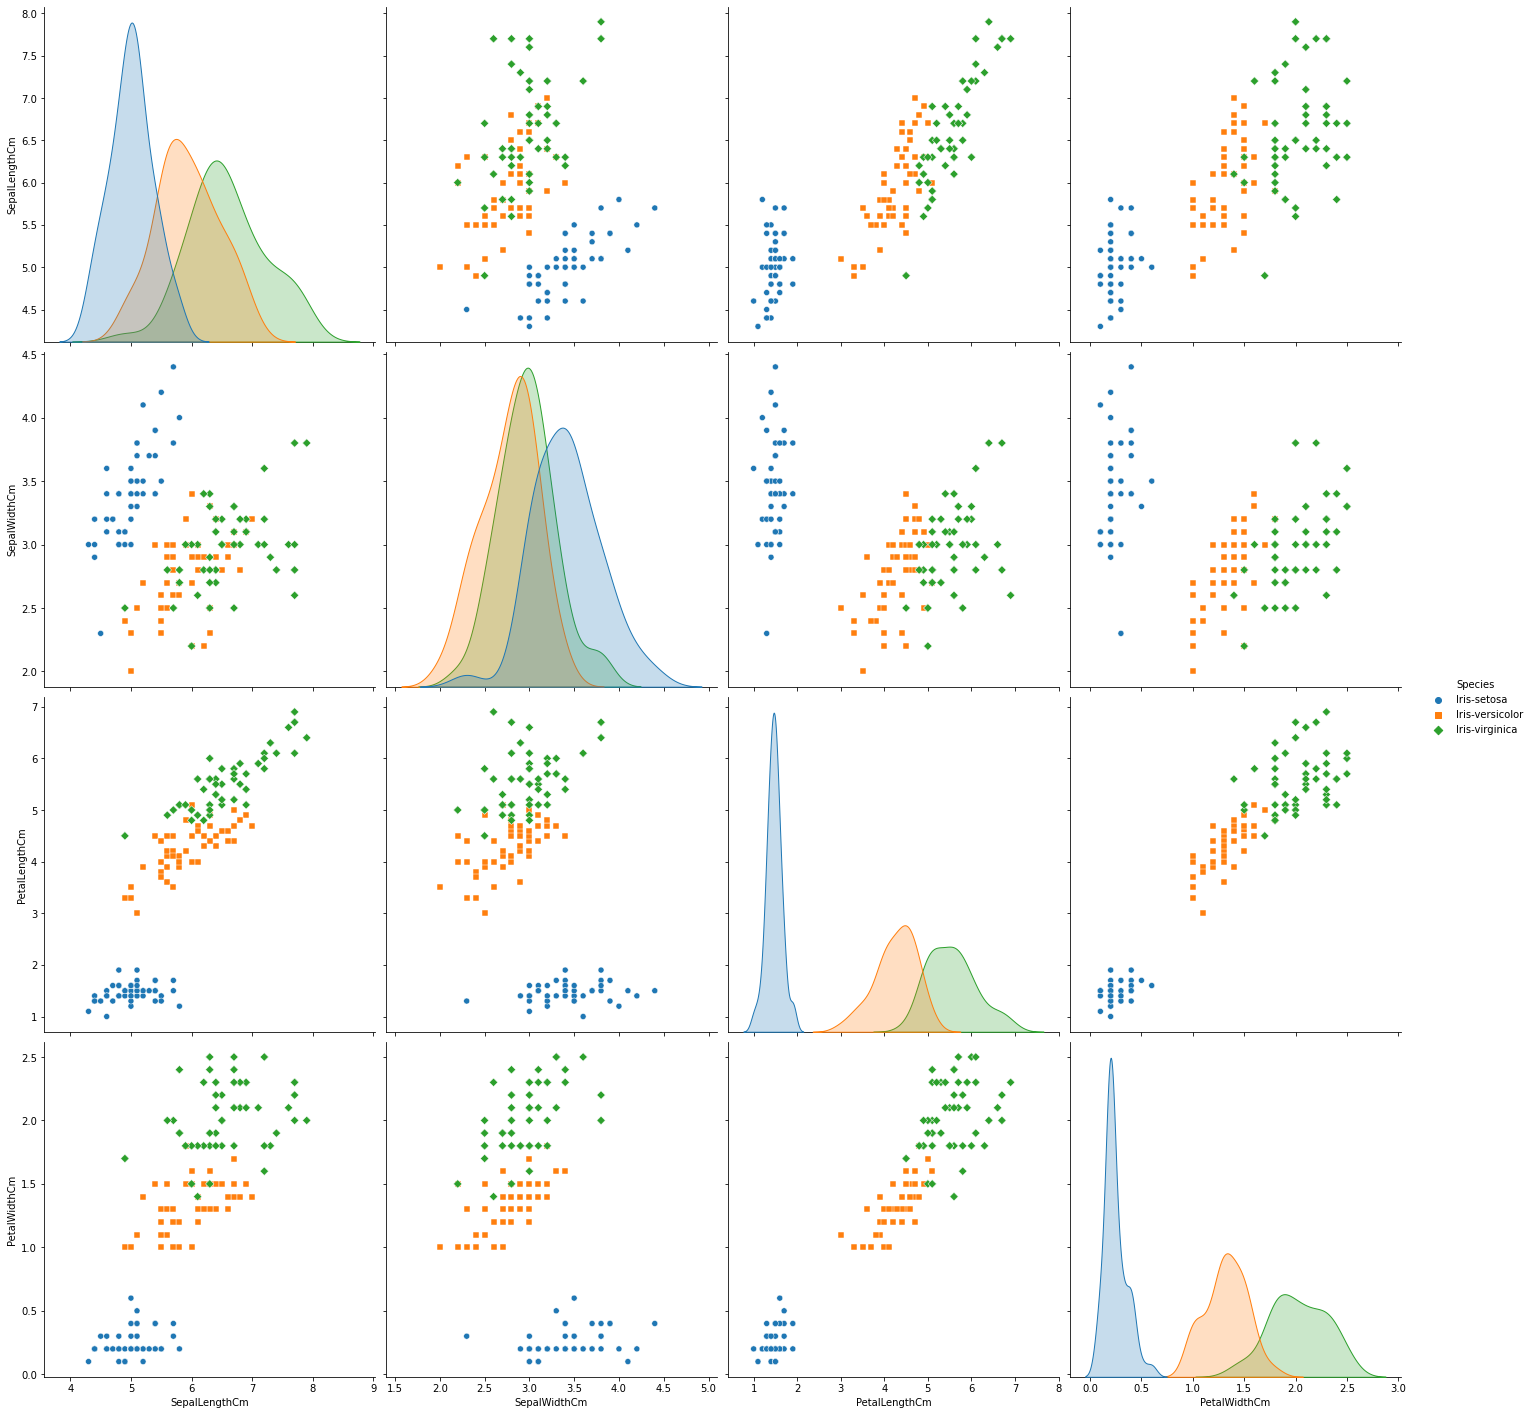

In [13]:
# Histogram Representation
plt.figure()
sns.pairplot(iris_data.drop("Id", axis=1), hue = "Species", size=5, markers=["o", "s", "D"])
plt.show()

In [14]:
# Predicting the KNN Model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

In [16]:
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(Xtrain, ytrain)

KNeighborsClassifier(n_neighbors=3)

In [18]:
y_pred = knn_classifier.predict(Xtest)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 2, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [19]:
accuracy = accuracy_score(ytest,y_pred)*100
print('accuracy = ' , accuracy ,'%' )

accuracy =  96.66666666666667 %


In [20]:
# Predicting by using sample data
input_data = (2,4.9,3.0,1.4)

# changing the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the np array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = knn_classifier.predict(input_data_reshaped)
print(prediction)
if (prediction[0]=='setosa'):
  print('The object is a setosa')
else:
  print('The object is a not setosa')

[0]
The object is a not setosa
